#### Step 0: Download data ['Male and female faces dataset'](https://www.kaggle.com/ashwingupta3012/male-and-female-faces-dataset)

In [75]:
import os
import hashlib
import cv2
import random
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#### Step 1: Calculate the md5 value of images and drop the same images.

In [66]:
def md5sum(filename):
    f = open(filename, 'rb')
    md5 = hashlib.md5()
    while True:
        fb = f.read(8096)
        if not fb:
            break
        md5.update(fb)
    f.close()
    return (md5.hexdigest())
 

def delfile(path):
    all_md5 = {}
    filedir = os.walk(path)
    for i in filedir:
        tem_str = i[0]
        print('Before drop duplicates, we have :',len(i[2]),'image')
        for tlie in i[2]:
            tlie = tem_str +'\\'+tlie
            if md5sum(tlie) in all_md5.values():
                #show the same images
                '''
                another_tlie = list(all_md5.keys())[list(all_md5.values()).index(md5sum(tlie))]
                image = Image.open(tlie)
                another = Image.open(another_tlie)
                showed_original = [np.array(image), np.array(another)]
                fig = plt.figure()
                for i in range(2):
                    plt.subplot(1, 2, i+1)
                    plt.imshow(showed_original[i]/255)
                plt.show()
                print(tlie,'has the same md5 with',another_tlie)
                '''
                os.remove(tlie)
            else:
                all_md5[tlie] = md5sum(tlie)
    filedir = os.walk(path)
    for i in filedir:
        print('After drop duplicates, we have :',len(i[2]),'image')


md5 of image 1: cda834529d1505ebce1ba6dfed2931cc
md5 of image 2: cda834529d1505ebce1ba6dfed2931cc


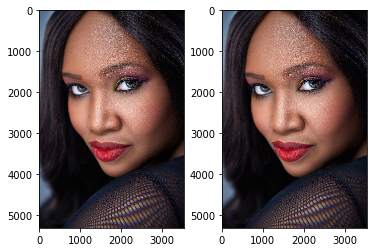

In [67]:
# An example of the similar images.
image1 = '0 (2).jpeg'
image2 = '0 (15).jpeg'
print('md5 of image 1:',md5sum(image1))
print('md5 of image 2:',md5sum(image1))
showed_original = [np.array(Image.open(image1)), np.array(Image.open(image2))]
fig = plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_original[i]/255)
plt.show()

In [74]:
#calculate the md5 value of images and drop the same images
path = os.getcwd()+'\\Male Faces'
delfile(path)

Before drop duplicates, we have : 2720 image
After drop duplicates, we have : 966 image


#### Step 2: Calculate the Mean Hash distance of images and drop the similar images.

In [69]:
def mean_hash(image):
    """
    https://zhuanlan.zhihu.com/p/85459084
    Mean Hash , return a 8x8 vector with 0 or 1
    Args:
        image:image that want be converted, with PIL Image type
    Returns:
        numpy vector with hash code
    """
    # step1：resize and gray scale image
    image_resized = image.convert("L").resize((resize_n,resize_n), Image.ANTIALIAS)
    image_numpy = np.array(image_resized)
    
    # step2：compute mean gray value
    mean_value = np.mean(image_numpy)
    
    # create empty list to store hanming code
    hash_code = []
    # step：3
    # Traversal every pixel and compare it with mean gray value
    for i in range(image_numpy.shape[0]):
        for j in range(image_numpy.shape[1]):
            if image_numpy[i, j] > mean_value:
                hash_code.append(1)
            elif image_numpy[i, j] <=  mean_value:
                hash_code.append(0)
    return hash_code
    
def hanming(image_code, ref_code):
    """
    calculate hanming distance between image and reference
    Args:
        image_code: list type
        ref_code: list type
    """
    assert len(image_code)== len(ref_code)
    return sum(abs(np.array(image_code)-np.array(ref_code)))/len(image_code)
    

md5 of image 1: b2e89c1e0dfcabb7928b559c67491a32
md5 of image 2: 71d25ed7d45868b9e4f4a3f49a0aef90
<class 'list'>


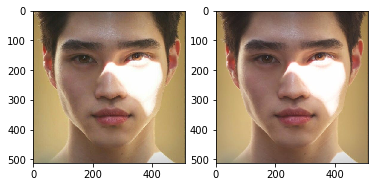

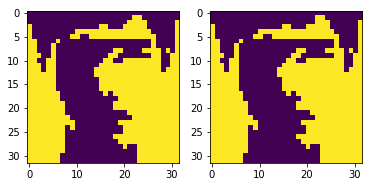

0.0009765625


In [79]:
# An example of the similar images.
image1 = '512_512_9949.jpg'
image2 = "512_512.jpg"
print('md5 of image 1:',md5sum(image1))
print('md5 of image 2:',md5sum(image2))

resize_n =32
image = Image.open(image1)
image_code = mean_hash(image)
print(type(image_code))
ref = Image.open(image2)
ref_code = mean_hash(ref)

distance = hanming(image_code, ref_code) 
showed_original = [np.array(image), np.array(ref)]
showed_hash = [np.array(image_code).reshape(resize_n, resize_n), np.array(ref_code).reshape(resize_n, resize_n)]
# plot image and ref
fig = plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_original[i]/255)
plt.show()

# plot image_code and ref_code
plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_hash[i]/255)
plt.show()
print(distance)

md5 of image 1: 6035daa277f6f5f7563de4840bec1c07
md5 of image 2: c9e773d486c4da2b373d5b79722cd088
<class 'list'>


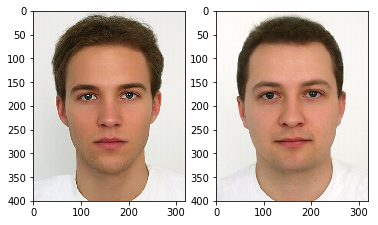

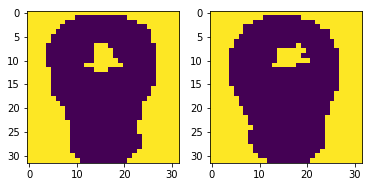

0.046875


In [80]:
# An example of the similar images.
image1 = '400_320.jpg'
image2 = '400_320_9398.jpg'
print('md5 of image 1:',md5sum(image1))
print('md5 of image 2:',md5sum(image2))

resize_n =32
image = Image.open(image1)
image_code = mean_hash(image)
print(type(image_code))
ref = Image.open(image2)
ref_code = mean_hash(ref)

distance = hanming(image_code, ref_code) 
showed_original = [np.array(image), np.array(ref)]
showed_hash = [np.array(image_code).reshape(resize_n, resize_n), np.array(ref_code).reshape(resize_n, resize_n)]
# plot image and ref
fig = plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_original[i]/255)
plt.show()

# plot image_code and ref_code
plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_hash[i]/255)
plt.show()
print(distance)

In [75]:
resize_n = 32

df = pd.DataFrame(columns=['tile','code'])

path = os.getcwd()+'\\Male Faces'
filedir = os.walk(path)
tem_str = ''
for i in filedir:
    tem_str = i[0]
    df['tile'] = i[2]
df['code'] = df['tile'].apply(lambda x: mean_hash(Image.open(tem_str + '\\' + x)))

In [76]:
drop_list = []
for index1 in df.index:
    code1 = df.loc[index1,'code']
    for index2 in df.index:
        if index2==index1:
            continue
        else:
            code2 = df.loc[index2,'code']
            distance = hanming(code1, code2)
            if distance<=0.005:
                #show the similar images
                '''
                image1 = Image.open(tem_str +'\\' + df.loc[index1,'tile'])
                image2 = Image.open(tem_str +'\\' + df.loc[index2,'tile'])
                showed_original = [np.array(image1), np.array(image2)]
                fig = plt.figure()
                for i in range(2):
                    plt.subplot(1, 2, i+1)
                    plt.imshow(showed_original[i]/255)
                plt.show()
                print(df.loc[index1,'tile'],df.loc[index2,'tile'])
                '''
                df.drop(index1,axis=0)
                drop_list.append(df.loc[index1,'tile'])
                break

In [77]:
len(drop_list)

281

In [78]:
for tlie in drop_list:
    tlie = tem_str +'\\'+tlie
    os.remove(tlie)
filedir = os.walk(path)
for i in filedir:
    print('After drop similar images, we have :',len(i[2]))

After drop similar images, we have : 685


#### Step 3:Remove incomplete face.Crop the image by code so that the proportion of face occupied in the whole is similar to that of CelebA-HQ (about 43% of the image).
ref:
* https://www.cnblogs.com/yytxdy/p/11777861.html
* https://blog.csdn.net/SHAOYEZUIZUISHAUI/article/details/103301229


In [219]:
classifier = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
# Download from: https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

Face: [131 104 251 251]
Face: [609 106 256 256]
Size: 1000 * 650


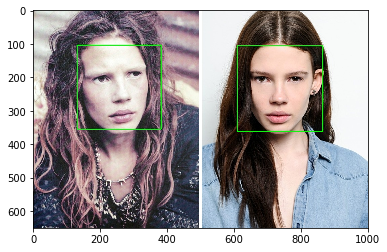

In [234]:
#An example for the face dector
image = "0 (1722).jpg"
img = cv2.imread(image)
faces = classifier.detectMultiScale(img, scaleFactor=1.1, minNeighbors=2, minSize=(128,128))
for face in faces:
    x, y, w, h = face
    cv2.rectangle(img, (x, y), (x + h, y + w), (0, 255, 0), 2)
    print('Face:',face)
if len(faces) > 0:
    cv2.imwrite("example.jpg", img)
print('Size:',len(img[0]),"*",len(img))
showed_original = np.array(Image.open('example.jpg'))
plt.imshow(showed_original/255)
plt.show()

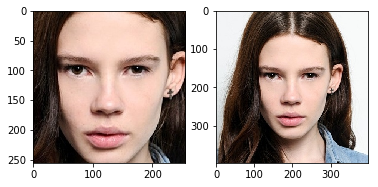

In [217]:
#An example for cutting biggest face
img = cv2.imread("0 (1722).jpg")
faces = classifier.detectMultiScale(img, scaleFactor=1.1, minNeighbors=3, minSize=(128,128))

if len(faces) > 0:
    if len(faces)>1:
            big_index = faces[:,3].tolist().index(max(faces[:,3]))
            big_face = faces[big_index]
            x, y, w, h = big_face
    else:
        x, y, w, h = faces[0]
    img1 = img[y:y+h,x:x+w]
    cv2.imwrite("example1.jpg", img1)
    size_n = np.sqrt(w*h/0.43)
    size_n = min(size_n,len(img[0]),len(img))
    size_plus = int((size_n-w)/2)
    new_y = max(0,y-size_plus)
    new_y_h = min(len(img),y+h+size_plus)
    new_x = max(0,x-size_plus)
    new_x_w = min(len(img[0]),x+w+size_plus)
    img2 = img[new_y:new_y_h,new_x:new_x_w]
    cv2.imwrite("example2.jpg", img2)

showed_original = [np.array(Image.open('example1.jpg')), np.array(Image.open('example2.jpg'))]
fig = plt.figure()
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(showed_original[i]/255)
plt.show()

In [228]:
path = os.getcwd()+'\\Male Faces'
filedir = os.walk(path)
tem_str = ''
incomplete_list = []
for i in filedir:
    tem_str = i[0]
    for tile in i[2]:
        img = cv2.imread(tem_str+'\\' + tile)
        faces = classifier.detectMultiScale(img, scaleFactor=1.1, minNeighbors=2, minSize=(128,128))
        if len(faces) ==0:
            incomplete_list.append(tile)
            continue
        elif len(faces)>1:
            big_index = faces[:,3].tolist().index(max(faces[:,3]))
            big_face = faces[big_index]
            x, y, w, h = big_face
        else:
            x, y, w, h = faces[0]
        size_n = np.sqrt(w*h/0.43)
        size_n = min(size_n,len(img[0]),len(img))
        size_plus = int((size_n-w)/2)
        new_y = max(0,y-size_plus)
        new_y_h = min(len(img),y+h+size_plus)
        new_x = max(0,x-size_plus)
        new_x_w = min(len(img[0]),x+w+size_plus)
        img2 = img[new_y:new_y_h,new_x:new_x_w]
        new_name = os.getcwd()+'\\Male Faces1\\'+tile
        cv2.imwrite(new_name, img2)

In [229]:
len(incomplete_list)

87

#### Step 4:Check and remove incomplete image manually.